## Exercise with Capital Bikeshare data

In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [3]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
bikes.rename(columns={'count':'total'}, inplace=True)

In [6]:
bikes['hour'] = bikes.index.hour

In [7]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


- **hour** ranges from 0(midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1(non-holiday)

# Task 1
Run these two groupby statements and figure out what they tell you about the data

In [18]:
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [19]:
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

# Task 2

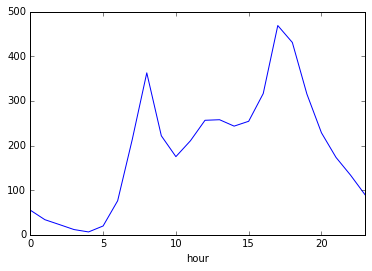

In [23]:
bikes.groupby('hour').total.mean().plot()

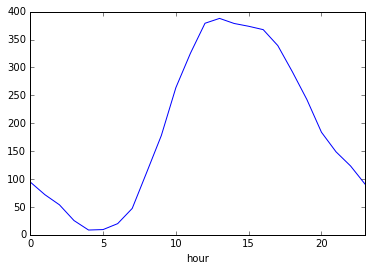

In [24]:
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

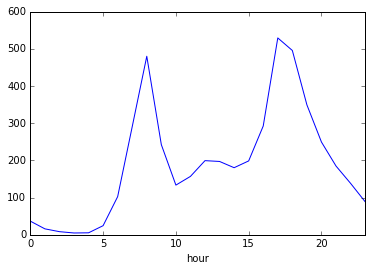

In [25]:
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

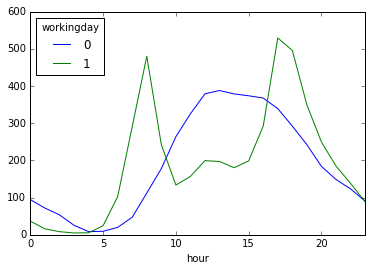

In [26]:
bikes.groupby(['hour','workingday']).total.mean().unstack().plot()

In [27]:
feature_cols = ['hour','workingday']
X = bikes[feature_cols]
y = bikes.total

In [28]:
linreg = LinearRegression()
linreg.fit(X,y)
linreg.coef_

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


array([ 10.49206282,   4.07248627])

# Task 4

In [30]:
scores = cross_val_score(linreg, X,y,cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

165.22328668912968

# Task 5


In [31]:
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
scores = cross_val_score(treereg, X, y, cv=10, scoring = "mean_squared_error")
np.mean(np.sqrt(-scores))

107.64196789476493

# Task 6

In [40]:
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)
# create a Graphviz file
export_graphviz(treereg, out_file='tree.dot', feature_names=feature_cols)

In [36]:
treereg.feature_importances_

array([ 0.99572261,  0.00427739])

In [38]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,hour,0.995723
1,workingday,0.004277
